---
# Caso Mail Spam

En este caso, entrenaremos un algoritmo de clasificación de correos spam a partir del dataset https://archive.ics.uci.edu/ml/datasets/spambase. Para esto, utilizaremos el algoritmo K-NN.

### Importación de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Lectura de los datos

In [2]:
# En el archivo spambase.names vienen los nombres de las 56 columnas
df_names = pd.read_csv('spambase.names', sep=':', header=None)

In [3]:
df_names.shape

(58, 2)

In [4]:
df_names[0]

0                 word_freq_make
1              word_freq_address
2                  word_freq_all
3                   word_freq_3d
4                  word_freq_our
5                 word_freq_over
6               word_freq_remove
7             word_freq_internet
8                word_freq_order
9                 word_freq_mail
10             word_freq_receive
11                word_freq_will
12              word_freq_people
13              word_freq_report
14           word_freq_addresses
15                word_freq_free
16            word_freq_business
17               word_freq_email
18                 word_freq_you
19              word_freq_credit
20                word_freq_your
21                word_freq_font
22                 word_freq_000
23               word_freq_money
24                  word_freq_hp
25                 word_freq_hpl
26              word_freq_george
27                 word_freq_650
28                 word_freq_lab
29                word_freq_labs
30        

In [5]:
# en el archivo spambase.data viene la data de las 56 columnas
df = pd.read_csv('spambase.data', names=df_names[0])

In [6]:
# verifique los primeros registros del dataframe
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [7]:
# imprima las dimensiones del dataframe
df.shape

(4601, 58)

### Limpieza de datos

In [8]:
# verifique la estructura del set de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [9]:
# verifique si tiene valore nulos, de ser así, haga un tratamiento de ellos
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

### Definición del modelo

Defina un modelo con todas los features. Note que la última columna (spam) contiene la variable objetivo (es spam o no es spam).

In [10]:
# Todas las columnas excepto 'spam' serán features
X = df.drop('spam', axis=1)
# La columna 'spam' es la variable objetivo (0 = no spam, 1 = spam)
y = df['spam']

In [11]:
# verifique los valores únicos de la variable objetivo
y.value_counts(), y.value_counts(normalize=True)

(spam
 0    2788
 1    1813
 Name: count, dtype: int64,
 spam
 0    0.605955
 1    0.394045
 Name: proportion, dtype: float64)

### Escalamiento de los datos

El algoritmo KNN (K-Nearest Neighbors) se basa en la medida de distancia entre puntos de datos para realizar predicciones. Si no se escalan las características en el conjunto de datos, las características con magnitudes más grandes pueden tener un impacto desproporcionado en la distancia entre puntos de datos, lo que puede sesgar el algoritmo KNN hacia esas características.

Cuando las características no están escaladas, las características con magnitudes más grandes dominarán la medida de distancia, lo que puede resultar en un comportamiento no deseado del algoritmo KNN. Por ejemplo, supongamos que tienes dos características, una con valores en el rango de 0 a 1 y otra con valores en el rango de 0 a 1000. La distancia entre dos puntos de datos estará dominada principalmente por la segunda característica, ignorando efectivamente la primera.

Por lo tanto, para asegurar que todas las características contribuyan de manera equitativa a la medida de distancia, es importante escalar las características en el conjunto de datos antes de aplicar el algoritmo KNN. Al escalar las características, todas ellas se ajustan a un rango común, generalmente entre 0 y 1 o con una media de 0 y una desviación estándar de 1, lo que garantiza que ninguna característica tenga un peso desproporcionado en la medida de distancia.

In [12]:
# import
from sklearn.preprocessing import StandardScaler

In [13]:
# escalar el set de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-3.42433707e-01,  3.30884903e-01,  7.12858774e-01,
        -4.68995838e-02,  1.15647106e-02, -3.50266176e-01,
        -2.91793886e-01, -2.62561558e-01, -3.23302359e-01,
        -3.71364386e-01, -2.96859527e-01,  1.14087333e-01,
        -3.12055206e-01, -1.74927167e-01, -1.90114405e-01,
         8.61714363e-02, -3.21135414e-01,  2.08120664e+00,
         1.50905374e-01, -1.67893113e-01,  1.25128398e-01,
        -1.18171509e-01, -2.90209203e-01, -2.12994388e-01,
        -3.28814669e-01, -2.99239934e-01, -2.27894812e-01,
        -2.31830156e-01, -1.66731450e-01, -2.25239518e-01,
        -1.60539307e-01, -1.43212021e-01, -1.74920257e-01,
        -1.45215148e-01, -1.98067390e-01, -2.42130222e-01,
        -3.23455613e-01, -5.98362369e-02, -1.80911344e-01,
        -1.85303849e-01, -1.20904684e-01, -1.72599962e-01,
        -2.05993114e-01, -1.27343320e-01, -2.97776209e-01,
        -1.97387481e-01, -7.13879045e-02, -1.11546231e-01,
        -1.58453362e-01, -5.14306549e-01, -1.55197675e-0

### Validación Cruzada

La validación cruzada es una técnica fundamental en el aprendizaje automático para evaluar el rendimiento de un modelo de manera más confiable y robusta. Aquí hay algunas razones clave por las cuales la validación cruzada es importante:

Estimación precisa del rendimiento del modelo: La validación cruzada proporciona una estimación más precisa del rendimiento del modelo en datos no vistos. Dividir el conjunto de datos en conjuntos de entrenamiento y prueba solo una vez puede llevar a una estimación sesgada del rendimiento del modelo, especialmente cuando el conjunto de datos es pequeño o no está representado de manera uniforme. La validación cruzada ayuda a mitigar este sesgo al realizar múltiples divisiones de los datos y promediar los resultados.

Evaluación de la generalización del modelo: La capacidad de un modelo para generalizar a datos no vistos es esencial en el aprendizaje automático. La validación cruzada proporciona una evaluación más sólida de la capacidad de generalización del modelo al evaluar su rendimiento en múltiples particiones de los datos. Esto ayuda a identificar si el modelo está sobreajustando o subajustando los datos.

Reducción del impacto de la aleatoriedad en la división de datos: Al dividir el conjunto de datos en múltiples subconjuntos de entrenamiento y prueba, la validación cruzada reduce el impacto de la aleatoriedad en la división de datos. Esto ayuda a garantizar que la evaluación del modelo sea más consistente y confiable, independientemente de cómo se seleccionen los conjuntos de entrenamiento y prueba.

Mejora de la selección de hiperparámetros: La validación cruzada se utiliza comúnmente para realizar la selección de hiperparámetros, donde se prueban diferentes combinaciones de valores de hiperparámetros en conjuntos de validación separados. Esto ayuda a encontrar la configuración óptima de hiperparámetros que maximiza el rendimiento del modelo en datos no vistos.


In [14]:
# import
from sklearn.model_selection import train_test_split

In [15]:
# dividir set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)
X_train.shape, X_test.shape

((3220, 57), (1381, 57))

### Entrenamiento Algoritmo


El algoritmo KNN (K-Nearest Neighbors) tiene varias ventajas, que lo hacen atractivo en ciertos contextos:

- **Simplicidad**: KNN es un algoritmo simple y fácil de entender. No requiere supuestos sobre la distribución de los datos y es relativamente fácil de implementar.
- **No paramétrico**: KNN es un algoritmo no paramétrico, lo que significa que no hace suposiciones sobre la forma funcional de los datos. Esto lo hace más flexible y puede manejar una amplia variedad de problemas de clasificación y regresión.
- **Robusto frente a ruido**: KNN puede ser robusto frente a datos ruidosos y no lineales. Al considerar múltiples vecinos cercanos para la predicción, puede reducir el impacto de los valores atípicos y el ruido en los datos.
- **Adaptabilidad a cambios en el conjunto de datos**: KNN es un algoritmo basado en instancias, lo que significa que no requiere una fase de entrenamiento explícita. Esto lo hace adaptable a cambios en el conjunto de datos, ya que se actualiza automáticamente cuando se introducen nuevos datos.
- **Adecuado para conjuntos de datos pequeños**: KNN puede funcionar bien en conjuntos de datos pequeños, ya que no necesita aprender relaciones complejas entre las características y las etiquetas. Además, no requiere una cantidad significativa de recursos computacionales durante el entrenamiento.
- **No linealidad**: KNN puede manejar problemas no lineales, ya que no impone ninguna estructura específica sobre los datos. Esto lo hace útil en situaciones donde la relación entre características y etiquetas no sigue una relación lineal.
- **Fácil adaptación a múltiples clases**: KNN es intrínsecamente multiclase y puede manejar problemas de clasificación con múltiples clases sin necesidad de modificaciones adicionales.

Sin embargo, también hay algunas limitaciones asociadas con KNN, como la sensibilidad al ruido, la necesidad de escalar las características y el alto costo computacional durante la fase de predicción, especialmente en conjuntos de datos grandes. Es importante considerar estas limitaciones al elegir KNN para un problema específico.


In [16]:
# Importar algoritmo KNN
from sklearn.neighbors import KNeighborsClassifier

In [17]:
# Ajustar modelo KNN con un valor inicial de k
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(f'Accuracy inicial en test (k=5): {knn.score(X_test, y_test):.3f}')

Accuracy inicial en test (k=5): 0.899


### Métricas de Evaluación

Al evaluar las métricas de clasificación de un algoritmo de detección de spam, es importante tener en cuenta varios aspectos para asegurar una evaluación precisa y significativa del rendimiento del modelo. Algunos de los cuidados que debemos tener incluyen:

- **Desbalance de clases**: En problemas de detección de spam, es común que las clases estén desbalanceadas, es decir, que haya muchas más instancias de correos legítimos que de spam. Esto puede sesgar las métricas de evaluación, especialmente si el algoritmo predice la clase dominante en la mayoría de los casos. Es importante considerar métricas que sean robustas frente al desbalance de clases, como precision, recall y F1-score.

- **Evaluación en datos no vistos**: Es fundamental evaluar el rendimiento del modelo en un conjunto de datos no vistos o conjunto de prueba independiente (set de test). Esto garantiza que el modelo sea capaz de generalizar a nuevos correos electrónicos y no solo memorice los datos de entrenamiento.

- **Métricas apropiadas**: Las métricas de evaluación deben seleccionarse cuidadosamente según las necesidades y objetivos del problema. Por ejemplo, precision y recall son útiles para evaluar el equilibrio entre la capacidad de identificar spam (recall) y la precisión de estas predicciones (precision).

- **Considerar costos asociados**: Dependiendo del contexto, los costos asociados con los errores de clasificación pueden variar. Por ejemplo, el costo de clasificar incorrectamente un correo legítimo como spam puede ser diferente del costo de clasificar incorrectamente un correo de spam como legítimo. Es importante tener en cuenta estos costos al interpretar las métricas de evaluación y al tomar decisiones sobre la configuración del modelo.

- **Interpretación de las métricas**: Es esencial comprender el significado de las métricas de evaluación y cómo se relacionan con el problema específico de detección de spam. Por ejemplo, un alto recall indica que el modelo es capaz de detectar la mayoría de los correos de spam, mientras que un alto precision indica que las predicciones positivas del modelo son en su mayoría correctas.

In [18]:
# importar librerias
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [19]:
# realizar predicciones sobre el X_test
y_pred = knn.predict(X_test)
y_pred[:10]

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 0])

In [20]:
# Calcular métricas de evaluación
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy : {acc:.3f}')
print(f'Precision: {prec:.3f}')
print(f'Recall   : {rec:.3f}')
print(f'F1-score : {f1:.3f}')
print('\nReporte de clasificación:')
print(classification_report(y_test, y_pred))

Accuracy : 0.899
Precision: 0.881
Recall   : 0.860
F1-score : 0.871

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       837
           1       0.88      0.86      0.87       544

    accuracy                           0.90      1381
   macro avg       0.90      0.89      0.89      1381
weighted avg       0.90      0.90      0.90      1381



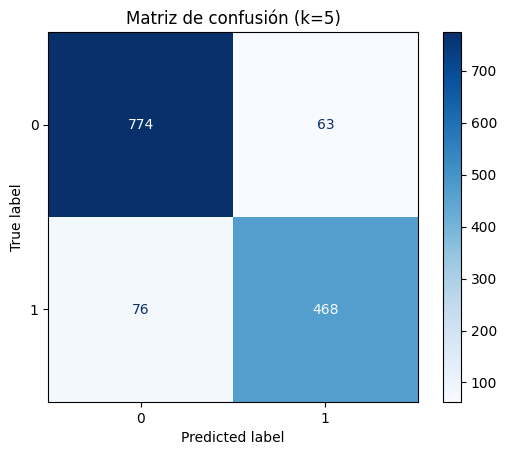

In [21]:
# Matriz de confusión para el modelo inicial
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Matriz de confusión (k=5)')
plt.show()

In [22]:
# Tabla de contingencia Real vs Predicción
pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predicción'])

Predicción,0,1
Real,,
0,774,63
1,76,468


### Determinación del valor de K

La determinación del valor de $k$ en el algoritmo KNN (K-Nearest Neighbors) es un aspecto crucial para lograr un rendimiento óptimo del modelo. El valor de $k$ especifica el número de vecinos más cercanos que se utilizarán para tomar una decisión de clasificación o regresión. quí hay algunas consideraciones importantes al elegir el valor de $k$:

- **Tamaño del conjunto de datos**: El valor de $k$ debe elegirse en función del tamaño del conjunto de datos. Si el conjunto de datos es pequeño, un valor de $k$ pequeño puede ser más apropiado, mientras que para conjuntos de datos más grandes, un valor de $k$ mayor puede ser más adecuado.

- **Balance entre sesgo y varianza**: Un valor de $k$ más pequeño tiende a tener un sesgo menor pero una varianza mayor, lo que puede llevar a un sobreajuste en el conjunto de entrenamiento. Por otro lado, un valor de $k$ más grande tiende a tener un sesgo mayor pero una varianza menor, lo que puede llevar a un subajuste. Es importante encontrar un equilibrio adecuado entre sesgo y varianza para obtener un buen rendimiento general del modelo.

- **Número de clases**: El número de clases en el problema de clasificación también puede influir en la elección del valor de $k$. Para conjuntos de datos con un número menor de clases, un valor de $k$ más pequeño puede ser suficiente. Sin embargo, para problemas de clasificación con un número mayor de clases, un valor de $k$ más grande puede ayudar a suavizar las fronteras de decisión y mejorar la generalización del modelo.

- **Validación cruzada**: Utilizar técnicas de validación cruzada, como la validación cruzada k-fold, puede ayudar a determinar el valor óptimo de $k$. Esto implica probar varios valores de $k$ y evaluar el rendimiento del modelo en cada iteración utilizando diferentes subconjuntos de datos.

- **Experimentación y ajuste fino**: A menudo, la elección del valor de $k$ implica cierto grado de experimentación y ajuste fino. Es importante probar diferentes valores de $k$ y evaluar cómo afectan el rendimiento del modelo en el conjunto de datos de prueba.


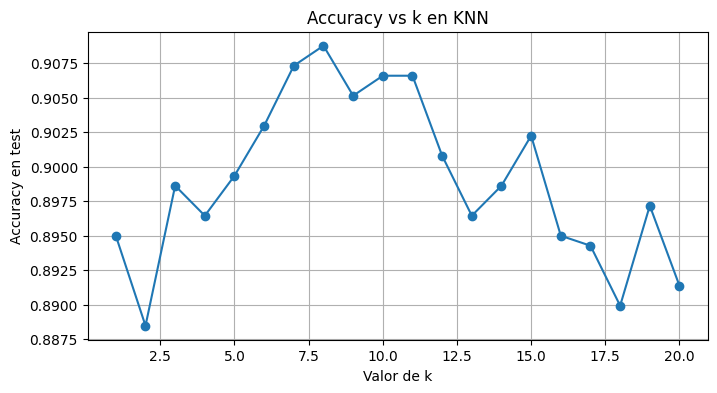

In [23]:
# En este caso, realizaremos un ajuste del valor de k por experimentación
# Determine el valor de k con el método de "prueba y error"
k_values = list(range(1, 21))
accuracies = []
for k in k_values:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train, y_train)
    accuracies.append(knn_k.score(X_test, y_test))

plt.figure(figsize=(8,4))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Valor de k')
plt.ylabel('Accuracy en test')
plt.title('Accuracy vs k en KNN')
plt.grid(True)
plt.show()

In [24]:
# ¿Cuál es el K seleccionado?
best_k = k_values[int(np.argmax(accuracies))]
print('Mejor k según accuracy en test:', best_k)

Mejor k según accuracy en test: 8


### Entrenamiento con el valor de K seleccionado

Por ultimo realizaremos un entrenamiento del modelo con el valor de K determinado anteriormente.

In [25]:
# Entrenar modelo final con el valor de k seleccionado
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [26]:
# realizar predicciones sobre el X_test
y_pred_final = knn_final.predict(X_test)
y_pred_final[:10]


array([0, 0, 1, 1, 1, 0, 0, 1, 0, 0])

In [27]:
# métricas de evaluación del modelo final
acc_f = accuracy_score(y_test, y_pred_final)
prec_f = precision_score(y_test, y_pred_final)
rec_f = recall_score(y_test, y_pred_final)
f1_f = f1_score(y_test, y_pred_final)
print(f'Accuracy final : {acc_f:.3f}')
print(f'Precision final: {prec_f:.3f}')
print(f'Recall final   : {rec_f:.3f}')
print(f'F1-score final : {f1_f:.3f}')
print('\nReporte de clasificación (modelo final):')
print(classification_report(y_test, y_pred_final))

Accuracy final : 0.909
Precision final: 0.911
Recall final   : 0.851
F1-score final : 0.880

Reporte de clasificación (modelo final):
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       837
           1       0.91      0.85      0.88       544

    accuracy                           0.91      1381
   macro avg       0.91      0.90      0.90      1381
weighted avg       0.91      0.91      0.91      1381



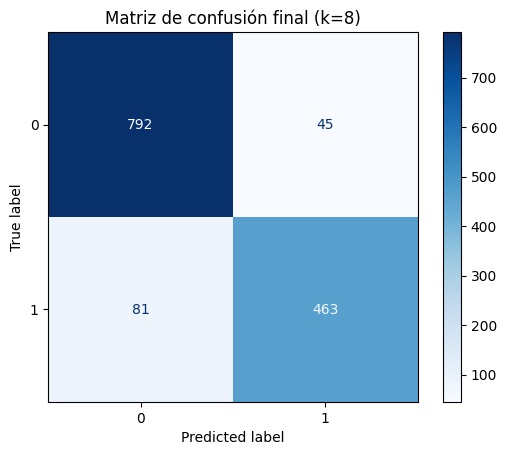

[[792  45]
 [ 81 463]]


In [31]:
# Matriz de confusión
cm_final = confusion_matrix(y_test, y_pred_final)
disp_final = ConfusionMatrixDisplay(confusion_matrix=cm_final)
disp_final.plot(cmap='Blues')
plt.title(f'Matriz de confusión final (k={best_k})')
plt.show()

print(cm_final)

Interpretación de la matriz de confusión final (asumiendo `0 = no spam`, `1 = spam`):

\[
\begin{bmatrix}
792 & 45 \\
81  & 463
\end{bmatrix}
\]

- **TN (verdaderos negativos) = 792**  
  Correos legítimos (0) correctamente clasificados como **no spam**.

- **FP (falsos positivos) = 45**  
  Correos legítimos (0) clasificados erróneamente como **spam**  
  → correos buenos que se van a la carpeta spam.

- **FN (falsos negativos) = 81**  
  Correos spam (1) clasificados erróneamente como **no spam**  
  → spam que llega a la bandeja de entrada.

- **TP (verdaderos positivos) = 463**  
  Correos spam (1) correctamente clasificados como **spam**.

Aproximando métricas para la clase *spam* (1):

- **Precision ≈** 463 / (463 + 45) ≈ 0.91  
- **Recall ≈** 463 / (463 + 81) ≈ 0.85  

Buen modelo: detecta la mayoría del spam con pocos falsos positivos, aunque todavía hay algo de spam que se cuela (FN).

Si llegaste hasta acá Eres un crack!

---